In [5]:
import findspark
findspark.init()

In [6]:
import pyspark
from pyspark.sql import SparkSession

In [7]:
sp=SparkSession.builder.appName('toddlerapp').getOrCreate()

In [8]:
path="d:\\"
df=sp.read.csv(path+'zoo.csv',inferSchema=True,header=True)
df.limit(6).toPandas()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df1=pd.read_csv(path+'zoo.csv')
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [14]:
scaler.fit(df1.drop('animal_name',axis=1))

StandardScaler()

In [15]:
scaled_feat=scaler.transform(df1.drop('animal_name',axis=1))

In [16]:
scaled_feat

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [19]:
finaldata=pd.DataFrame(scaled_feat,columns=df1.columns[1:])

In [20]:
finaldata

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,-0.875451
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,1.514294
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,1.992242


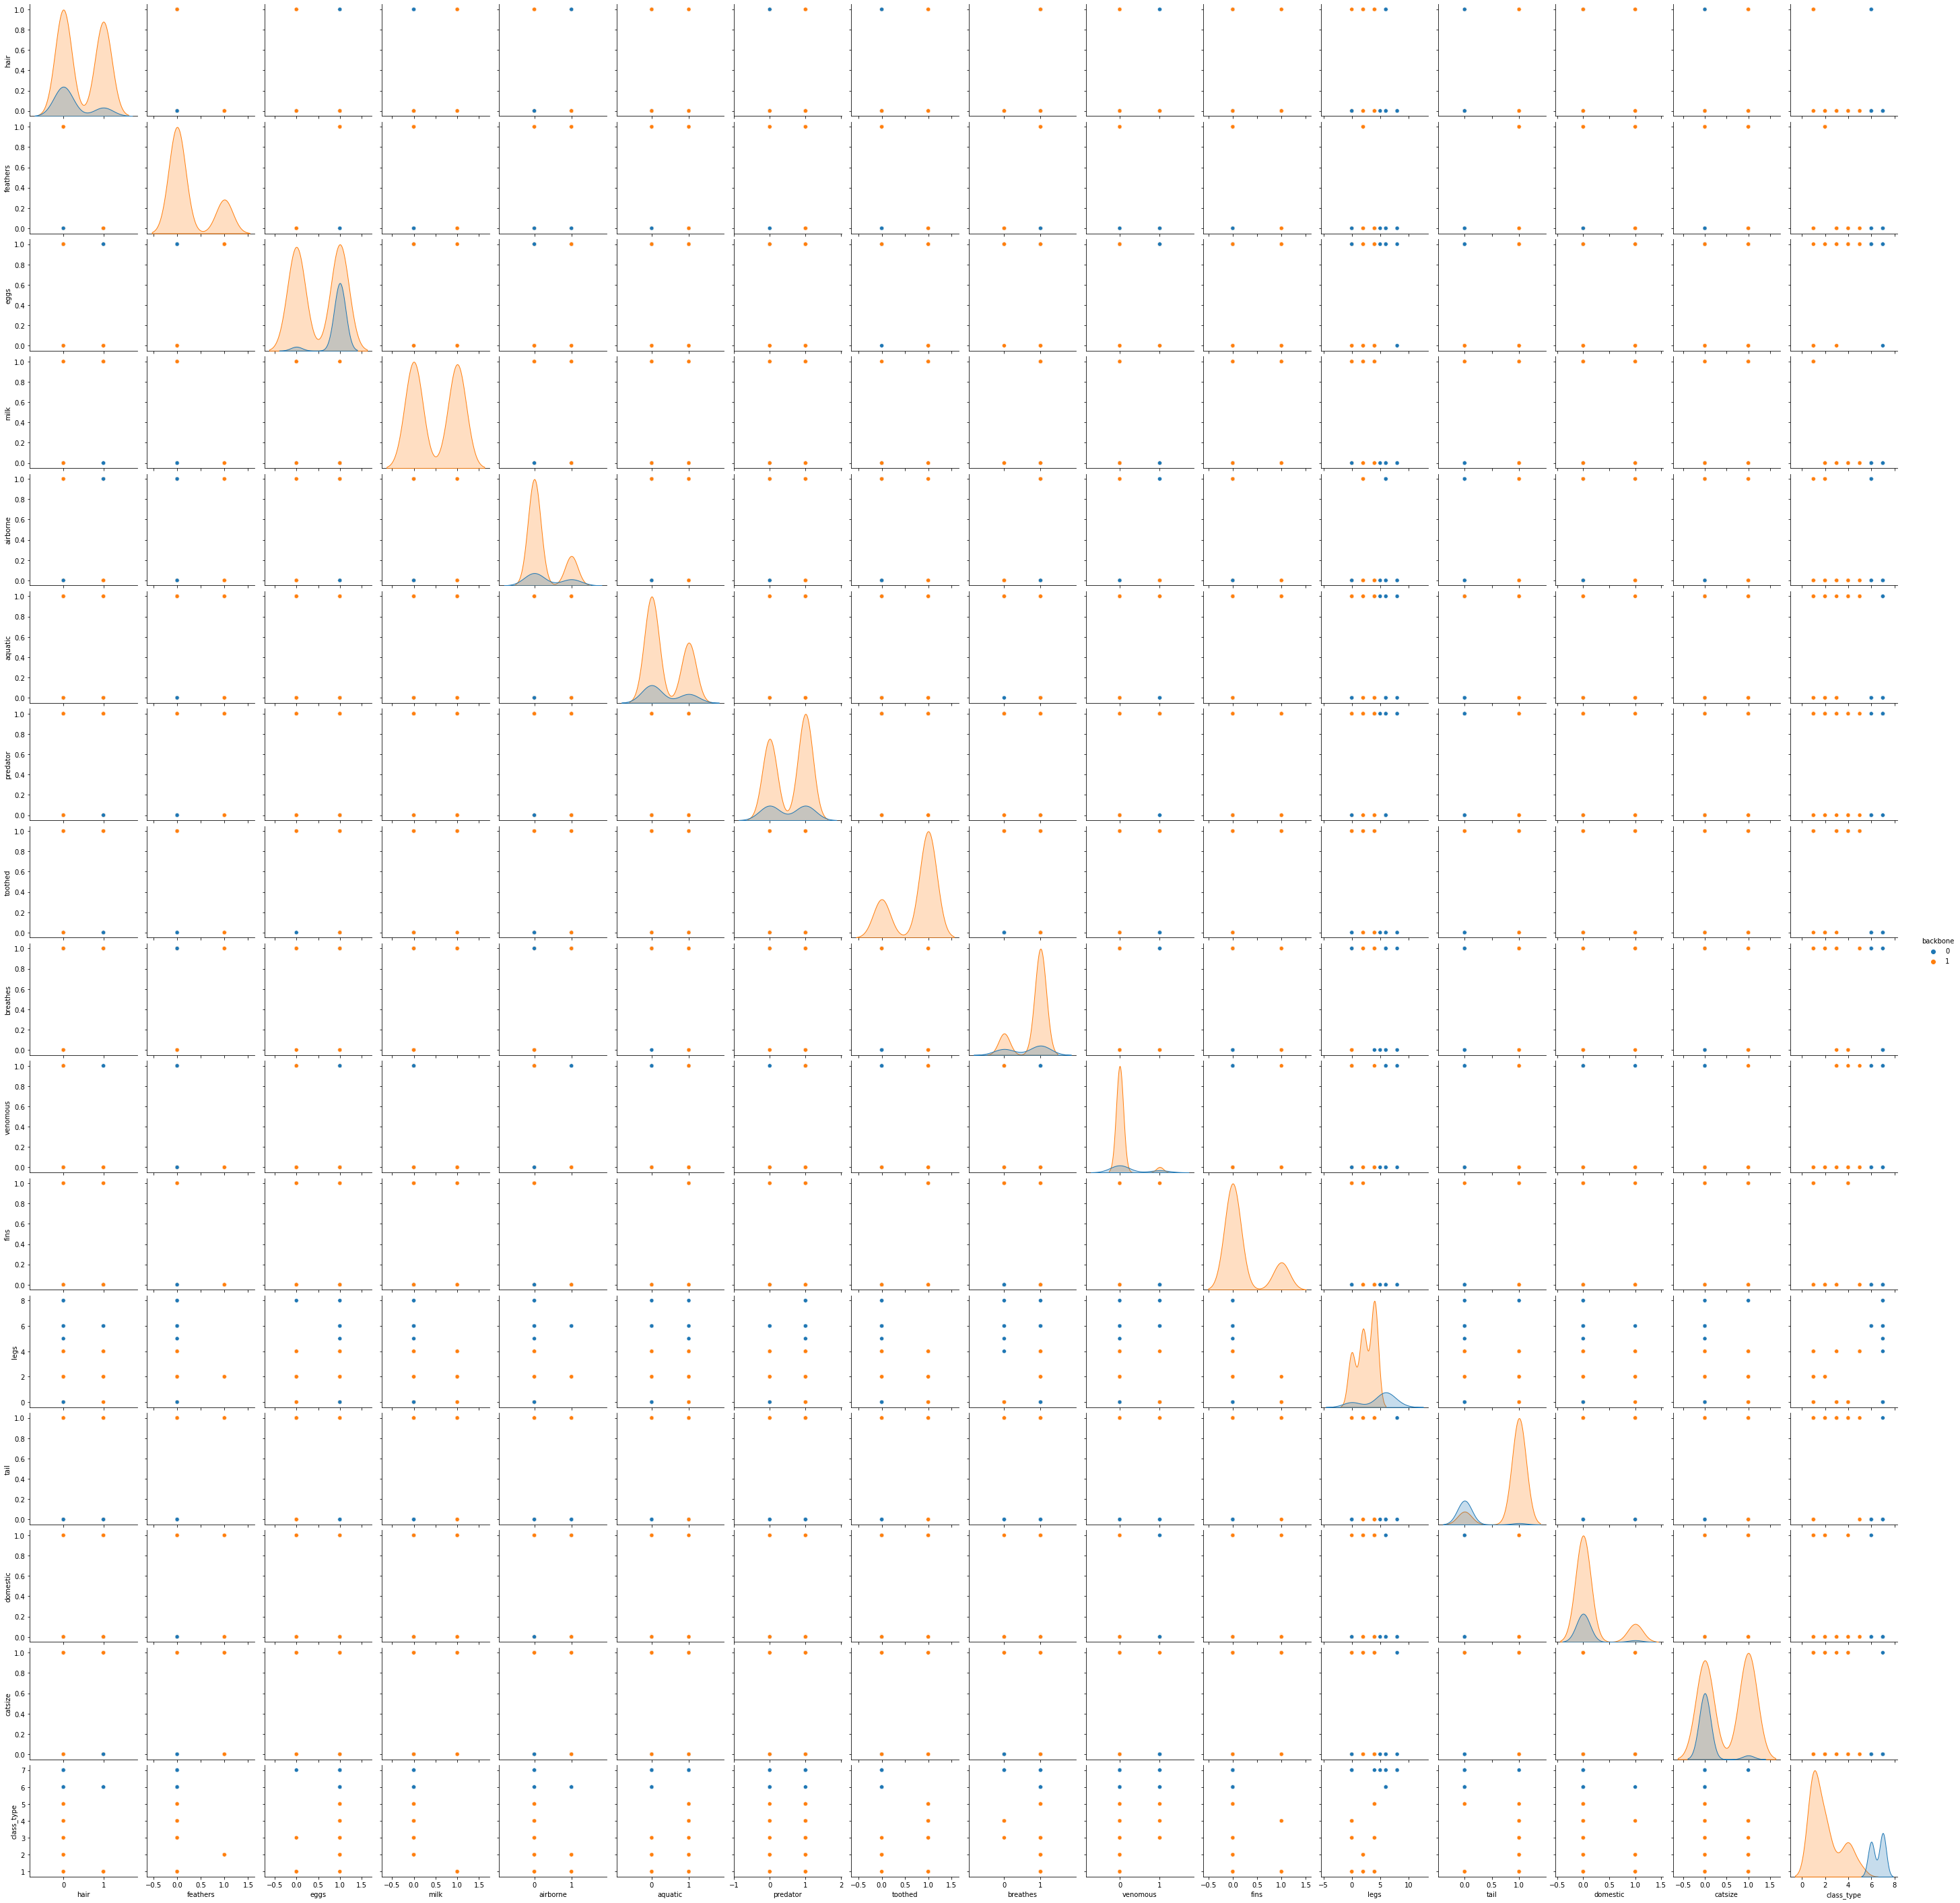

In [24]:
sns.pairplot(df1,hue='backbone')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feat,df1['backbone'],test_size=0.30)

In [28]:
k=1

In [29]:
#Knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(k)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
prectioins=knn.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [33]:
print(confusion_matrix(y_test,prectioins))

[[ 4  0]
 [ 0 27]]


In [34]:
print(confusion_matrix(y_test,prectioins))
print(classification_report(y_test,prectioins))

[[ 4  0]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        27

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [43]:
acc=[]
for i in range(1,40):
        knn=KNeighborsClassifier(i)
        score=cross_val_score(knn,scaled_feat,df1['backbone'],cv=10)
        acc.append(score.mean()) 
print(acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.99, 0.9800000000000001, 0.99, 0.9800000000000001, 0.99, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9718181818181819, 0.9818181818181818, 0.9218181818181819, 0.9318181818181819, 0.8718181818181818, 0.8718181818181818, 0.8218181818181819, 0.8318181818181818, 0.8218181818181819, 0.8218181818181819, 0.8218181818181819, 0.8218181818181819, 0.8218181818181819]


In [45]:
error_rate=[]
for i in range(1,40):
        knn=KNeighborsClassifier(i)
        score=cross_val_score(knn,scaled_feat,df1['backbone'],cv=10)
        error_rate.append(1-score.mean()) 

In [46]:
print(error_rate)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999999999907, 0.019999999999999907, 0.019999999999999907, 0.010000000000000009, 0.019999999999999907, 0.010000000000000009, 0.019999999999999907, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.0, 0.010000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028181818181818086, 0.018181818181818188, 0.07818181818181813, 0.06818181818181812, 0.12818181818181817, 0.12818181818181817, 0.1781818181818181, 0.1681818181818182, 0.1781818181818181, 0.1781818181818181, 0.1781818181818181, 0.1781818181818181, 0.1781818181818181]


Text(0, 0.5, 'Error Rate')

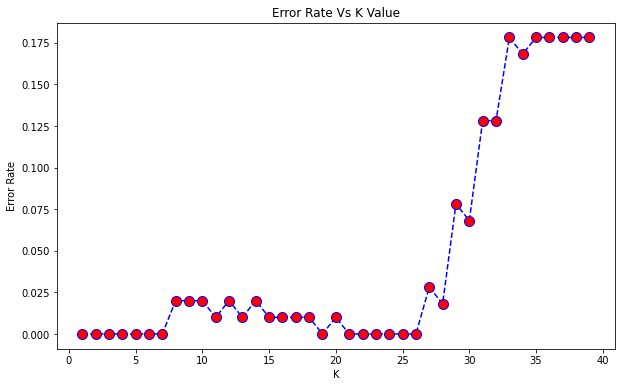

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

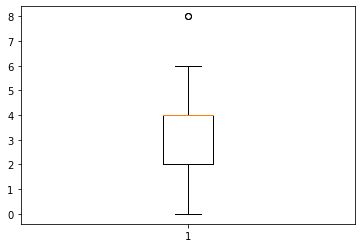

In [18]:
plt.boxplot(x='legs',data=df1)
plt.show()